## `Stochastic` vs `Batch` vs `Mini Batch` Gradient Descent 

### `Batch` Gradient Descent

- In ***Batch Gradient Descent*** during training the model with the training dataset we update the **weights** and **bias** after each **epoch** and run untill we reach at a lowest **error**.
- That is we go through all **training samples** and calculate **cumulative error**. Then we **Back Propagate** and adjust the **weights**.
  - As here we first initialize the **weights** and **bias** and find the **errors** for all the 6 samples as shown below.
  
  <img src="images/bgd1.png" width=800>
  
  - At the end of first **epoch** we calculate the **MSE** and then adjust the **weights** and **bias** using the derivatives.
  
  <img src="images/bgd2.png" width=800>
  
  - Now using these new updated **weights** we again run an entire **epoch** upto 6 samples as here.
  
  <img src="images/bgd3.png" width=800>
  
  - We will keep running this **epoch** until we reach a minimum **error** where we will have a correct value of **W1**, **W2** and **bias**.

- But if the training dataset is huge say there are 10 million samples on the training dataset.
- There to find the **cumulative error** for first round **(1st epoch)** we need to do a **Forward Pass** for **`10` million samples**.
- It means as here we have 2 features (area and bedrooms) we need to find **`20` million** derivatives.
- Now if there are `200` features so there it will be very complicated calculations and too much computation.

### `Stochastic` Gradient Descent 

- So here instead of all the samples we can select a random sample, find the **error** and then we can start adjusting the **weights**.

<img src="images/bgd4.png" width=800>

<img src="images/bgd5.png" width=800>

- Then in second iteration again select a random sample and find **error** using the previous adjusted **weights** and **bias** and then again start updating **weights**.

<img src="images/bgd6.png" width=800>

<img src="images/bgd7.png" width=800>

- So here we will keep adjusting **weights** after every training sample **Forward Pass**
- The key differences between **Batch Gradient Descent** and **Stochastic Gradient Descent** is as follows:

<img src="images/bgd8.png" width=800>

### `Mini Batch` Gradient Descent

- It is almost similar to **Stochastic Gradient Descent**, but here instead of choosing one randomly picked training sample, we will use a **batch** of randomly picked training samples.
- For example say we have `20` training samples in total.
- We pass say `5` random samples for one **Forward Pass** to calculate the **cumulative error**.
- After that we adjust **weights**.
- Difference between all 3 **Gradient Descents**

<img src="images/bgd9.png" width=800>

### Now starts with coding

In [26]:
# importing libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Here we will use the home prices of bangalore dataset

df = pd.read_csv("homeprices_bangalore.csv")
df.sample(5)

,area,bedrooms,price
14,2250,3,101.0
10,1800,3,82.0
6,2732,4,135.0
17,1540,3,60.0
11,2785,4,140.0


**Preprocessing/Scaling: Since our columns are on different sacle it is important to perform scaling on them.**

In [5]:
# Here we are using Min Max scalling

from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

In [6]:
# Scalling down area and bedrooms columns in the scale of 0 to 1

scaled_X = sx.fit_transform(df.drop('price', axis='columns'))

scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [10]:
# reshaped column price

df['price'].values.reshape(df.shape[0],1)

array([[ 39.07],
       [120.  ],
       [ 62.  ],
       [ 75.  ],
       [ 51.  ],
       [ 38.  ],
       [135.  ],
       [155.  ],
       [ 50.  ],
       [167.  ],
       [ 82.  ],
       [140.  ],
       [ 38.  ],
       [ 40.  ],
       [101.  ],
       [ 42.  ],
       [ 48.  ],
       [ 60.  ],
       [102.  ],
       [ 32.  ]])

In [12]:
# Here for y we are reshaping the column price

scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

**We should convert target column (i.e. price) into one dimensional array. It has become 2D due to scaling that we did above but now we should change to 1D**

In [ ]:
# reshaping scaled_y into 1d

scaled_y.reshape(20,)

#### Now applying `Batch Gradient Descent`

In [14]:
# getting number of features in the training dataset

scaled_X.shape[1]

2

In [15]:
# initializing weights as 1 to both the features of the training dataset

np.ones(shape=(scaled_X.shape[1]))

array([1., 1.])

In [16]:
# total number of samples in the training dataset

scaled_X.shape[0]

20

In [17]:
# Transposed of scaled_X

scaled_X.T

array([[0.08827586, 0.62068966, 0.22068966, 0.24862069, 0.13793103,
        0.12758621, 0.6662069 , 0.86206897, 0.17586207, 1.        ,
        0.34482759, 0.68448276, 0.06896552, 0.10344828, 0.5       ,
        0.12931034, 0.13103448, 0.25517241, 0.67931034, 0.        ],
       [0.25      , 0.75      , 0.5       , 0.5       , 0.25      ,
        0.25      , 0.75      , 0.75      , 0.5       , 1.        ,
        0.5       , 0.75      , 0.25      , 0.25      , 0.5       ,
        0.25      , 0.5       , 0.5       , 0.5       , 0.        ]])

In [19]:
# Assigning weights using dot product

w = np.ones(shape=(2))

np.dot(w, scaled_X.T)

array([0.33827586, 1.37068966, 0.72068966, 0.74862069, 0.38793103,
       0.37758621, 1.4162069 , 1.61206897, 0.67586207, 2.        ,
       0.84482759, 1.43448276, 0.31896552, 0.35344828, 1.        ,
       0.37931034, 0.63103448, 0.75517241, 1.17931034, 0.        ])

In [20]:
# using all above logics

def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):

    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 2 (area, bedroom)
    # initializing bias as 0
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0] # number of rows in X
    
    cost_list = []
    epoch_list = []
    
    # iterating through epochs
    for i in range(epochs):
        # calculating y predicted as "w1 * area + w2 * bedrooms + bias". Here we are using 'np.dot()' for the features * weights
        # Here we do transpose of the columns
        y_predicted = np.dot(w, X.T) + b

        # Now finding out derivative of errors with respect to weights and bias
        w_grad = -(2/total_samples)*(X.T.dot(y_true - y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true - y_predicted)
        
        # adjusting the weights and bias
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        # calculating the cost using MSE (Mean Squared Error)
        cost = np.mean(np.square(y_true - y_predicted)) 
        
        # recording the cost and epoch at every 10th iteration 
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

In [21]:
# calling the function with 500 epochs

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),500)
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

##### Now plotting a chart to see how the cost is reducing at each `epoch`

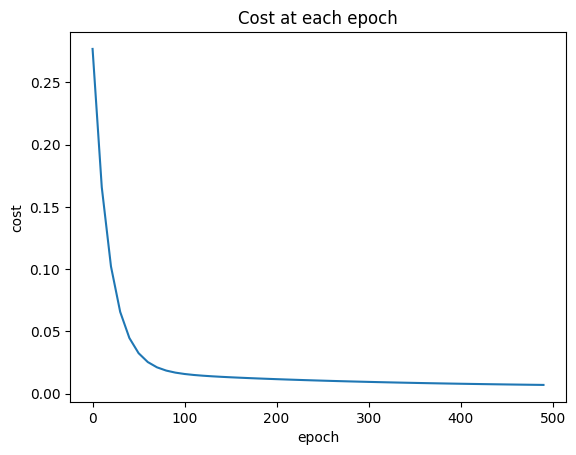

In [22]:
plt.plot(epoch_list,cost_list)
plt.xlabel("epoch")
plt.ylabel("cost")
plt.title("Cost at each epoch")
plt.show()

**Lets do some predictions now.**

In [23]:
# Here we will transform the area and number of bedroom to be scaled

def predict(area,bedrooms,w,b):
    scaled_X = sx.transform([[area, bedrooms]])[0]
    # here w1 = w[0] , w2 = w[1], w3 = w[2] and bias is b
    # equation for price is w1*area + w2*bedrooms + w3*age + bias
    # scaled_X[0] is area
    # scaled_X[1] is bedrooms
    # scaled_X[2] is age
    
    
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    # once we get price prediction we need to to rescal it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    
    # Now we need to reverse transform the scaled price for this we use inverse_transform()
    return sy.inverse_transform([[scaled_price]])[0][0]

In [27]:
# Let's predicting with 4 bedroom and 2600 sqft area

predict(2600, 4, w, b)

128.45484403267596

In [28]:
predict(1000,2,w,b)

30.253094462442355

#### Now applying `Stochastic Gradient Descent`

In [29]:
# we will use random libary to pick random training sample.
# randit gives random number between two numbers specified in the argument
# Here we are using a random value between 0 and 6

import random
random.randint(0,6) 

6

In [30]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
 
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):    
        random_index = random.randint(0,total_samples-1) # random index from total samples
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(w, sample_x.T) + b
    
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.square(sample_y-y_predicted)
        
        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

In [32]:
# calling the function with 10000 epochs

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

(array([0.70909884, 0.67610634]), -0.23240074389719145, 0.01132591114434825)

**Compare this with weights and bias that we got using gradient descent. They both of quite similar.**

In [33]:
w,b,cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

#### Doing plotting

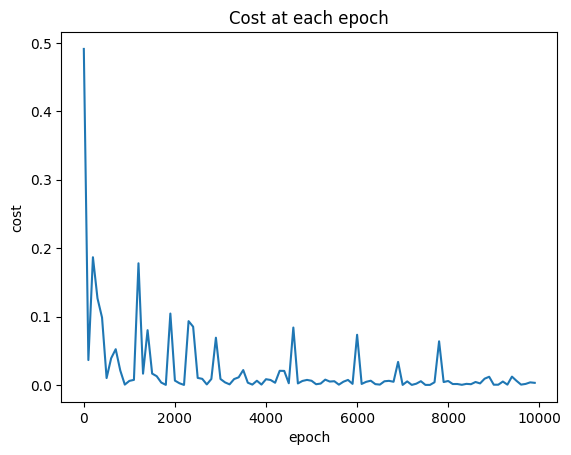

In [34]:
plt.plot(epoch_list_sgd,cost_list_sgd)
plt.xlabel("epoch")
plt.ylabel("cost")
plt.title("Cost at each epoch")
plt.show()

In [35]:
# Let's predicting with 4 bedroom and 2600 sqft area

predict(2600, 4, w_sgd, b_sgd)

128.49925817504777

In [36]:
predict(1000,2,w_sgd, b_sgd)

30.046443091443198